In [1]:
import torch
import numpy as np
import torch.optim as optim

t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]

t_u = torch.tensor(t_u).unsqueeze(1) #input
t_c = torch.tensor(t_c).unsqueeze(1) #ground truth

n_samples = t_u.shape[0]
n_val = int (0.2 * n_samples)

random_indexes = torch.randperm(n_samples)
train_indexes = random_indexes[:-n_val]
val_indexes = random_indexes[-n_val:]

t_c_train = t_c[train_indexes]
t_u_train = t_u[train_indexes]
t_c_val = t_c[val_indexes]
t_u_val = t_u[val_indexes]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [2]:
import torch.nn as nn

linear_model = nn.Linear(1,1) # 1 input, 1 output
linear_model.weight, linear_model.bias, list(linear_model.parameters())

linear_model(t_un_train)

tensor([[-2.1879],
        [-2.4343],
        [-1.7708],
        [-2.4474],
        [-2.8448],
        [-1.3143],
        [-1.7117],
        [-3.2882],
        [-2.5821]], grad_fn=<AddmmBackward0>)

In [3]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        t_p_val = model(t_u_val)

        los_train = loss_fn(t_p_train, t_c_train)
        los_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        los_train.backward()
        optimizer.step()

        if epoch <=5 or epoch % 1000 == 0:
            print("epoch=%d train_loss=%f, val loss=%f" %(epoch, los_train, los_val))

In [4]:
training_loop(
    n_epochs=10000,
    optimizer=optim.SGD(linear_model.parameters(), lr=0.01),
    model=linear_model,
    loss_fn=nn.MSELoss(),
    t_c_train=t_c_train,
    t_c_val=t_c_val,
    t_u_train=t_un_train,
    t_u_val=t_un_val
)

epoch=1 train_loss=260.317047, val loss=205.360962
epoch=2 train_loss=68.292023, val loss=31.511799
epoch=3 train_loss=38.744064, val loss=8.320328
epoch=4 train_loss=34.110020, val loss=6.108861
epoch=5 train_loss=33.296577, val loss=6.285840
epoch=1000 train_loss=3.869721, val loss=1.446539
epoch=2000 train_loss=3.358438, val loss=1.093300
epoch=3000 train_loss=3.349701, val loss=1.053075
epoch=4000 train_loss=3.349551, val loss=1.047917
epoch=5000 train_loss=3.349548, val loss=1.047249
epoch=6000 train_loss=3.349550, val loss=1.047214
epoch=7000 train_loss=3.349550, val loss=1.047214
epoch=8000 train_loss=3.349550, val loss=1.047214
epoch=9000 train_loss=3.349550, val loss=1.047214
epoch=10000 train_loss=3.349550, val loss=1.047214


In [5]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[5.3331]], requires_grad=True),
 Parameter containing:
 tensor([-17.1405], requires_grad=True))

In [6]:
seq_model = nn.Sequential(
    nn.Linear(1,13),# 1 input feature, 13 output features, bias is on
                    # 13 neurons having 1 weight and 1 bias (weights and bias are different for each neuron)
    nn.Tanh(),      
    nn.Linear(13,1) # 13 input featues, 1 output feature, bias is on
                    # 1 neuron consisting of 13 weights and 1 bias 
)

[param.shape for param in list(seq_model.parameters())]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [7]:
list(seq_model.named_parameters())

[('0.weight',
  Parameter containing:
  tensor([[-0.8288],
          [-0.1292],
          [ 0.3106],
          [-0.6993],
          [-0.4686],
          [-0.3729],
          [-0.6381],
          [ 0.1103],
          [-0.1762],
          [ 0.1936],
          [-0.3918],
          [ 0.2323],
          [ 0.7399]], requires_grad=True)),
 ('0.bias',
  Parameter containing:
  tensor([ 0.1814, -0.6659,  0.0710, -0.7264, -0.8462,  0.5309, -0.9990, -0.0779,
          -0.2745, -0.0467,  0.1551,  0.6646,  0.6557], requires_grad=True)),
 ('2.weight',
  Parameter containing:
  tensor([[-0.2069,  0.0471,  0.0845,  0.2172, -0.0915, -0.0233,  0.2360,  0.2205,
            0.1330,  0.1652, -0.0272, -0.1189, -0.1483]], requires_grad=True)),
 ('2.bias',
  Parameter containing:
  tensor([0.2231], requires_grad=True))]

In [8]:
from collections import OrderedDict

seq_model_2 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1,9)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(9,1)),
]))

seq_model_2
seq_model_2.hidden_linear.weight, seq_model_2.output_linear.bias

(Parameter containing:
 tensor([[ 0.3428],
         [-0.0928],
         [-0.7391],
         [ 0.8620],
         [-0.4952],
         [-0.2017],
         [ 0.4580],
         [ 0.7286],
         [ 0.6362]], requires_grad=True),
 Parameter containing:
 tensor([-0.1624], requires_grad=True))

In [9]:
training_loop(
    n_epochs=10000,
    optimizer=optim.SGD(seq_model.parameters(), lr=0.01),
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_c_train=t_c_train,
    t_c_val=t_c_val,
    t_u_train=t_un_train,
    t_u_val=t_un_val
)

epoch=1 train_loss=196.075256, val loss=144.222198
epoch=2 train_loss=146.724747, val loss=89.663666
epoch=3 train_loss=118.060478, val loss=57.598068
epoch=4 train_loss=101.393654, val loss=38.655273
epoch=5 train_loss=91.722412, val loss=27.780794
epoch=1000 train_loss=10.312040, val loss=3.710166
epoch=2000 train_loss=1.666685, val loss=1.138030
epoch=3000 train_loss=1.414507, val loss=1.660939
epoch=4000 train_loss=1.307508, val loss=1.994859
epoch=5000 train_loss=1.240702, val loss=2.221145
epoch=6000 train_loss=1.190571, val loss=2.387336
epoch=7000 train_loss=1.149686, val loss=2.517653
epoch=8000 train_loss=1.115078, val loss=2.624150
epoch=9000 train_loss=1.085275, val loss=2.713218
epoch=10000 train_loss=1.059381, val loss=2.788477


In [10]:
list(seq_model.parameters())

t_p = seq_model(t_u * 0.1)

In [11]:
range_t = torch.arange(20,90).unsqueeze(1)
range_t

tensor([[20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42],
        [43],
        [44],
        [45],
        [46],
        [47],
        [48],
        [49],
        [50],
        [51],
        [52],
        [53],
        [54],
        [55],
        [56],
        [57],
        [58],
        [59],
        [60],
        [61],
        [62],
        [63],
        [64],
        [65],
        [66],
        [67],
        [68],
        [69],
        [70],
        [71],
        [72],
        [73],
        [74],
        [75],
        [76],
        [77],
        [78],
        [79],
        [80],
        [81],
        [82],
        [83],
        [84],
        [85],
        [86],
        [87],
        [88],
        [89]])

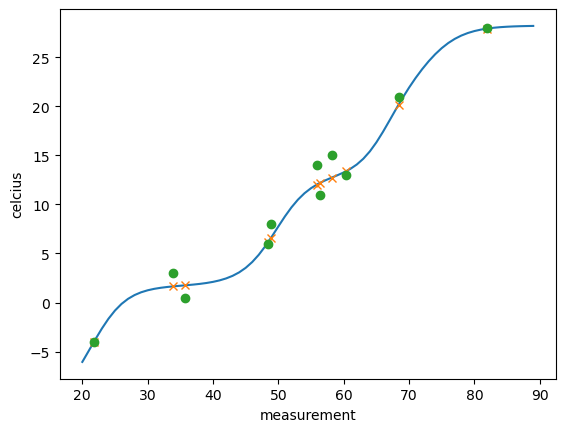

In [12]:
from matplotlib import pyplot as plt

plt.figure(dpi = 100)
plt.xlabel("measurement")
plt.ylabel("celcius")
plt.plot(range_t.numpy(), seq_model(range_t*0.1).detach().numpy())
plt.plot(t_u.numpy(), t_p.detach().numpy(), 'x')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')